In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

In [2]:
print(tf.__version__)

2.8.0


In [3]:
dataset = pd.read_csv("/content/diabetes.csv")

In [ ]:
dataset.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
# get numpy ndarray
dataset = dataset.values

In [6]:
type(dataset)

numpy.ndarray

In [7]:
dataset.shape

(767, 9)

In [8]:
# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.25, random_state=42)

In [10]:
sc.fit(X_train)
sc.transform(X_train)
sc.fit(X_test)
sc.transform(X_test)

array([[ 0.68289227, -0.76579988, -0.36993244, ...,  0.28785733,
        -0.16235258,  0.96782064],
       [-0.85601989,  0.9779149 ,  0.24388139, ..., -0.92114345,
        -1.09380192, -0.74274608],
       [-0.54823746, -0.470255  , -0.10686937, ..., -0.1727144 ,
        -0.98761063, -1.01283556],
       ...,
       [-0.54823746, -1.2091172 , -0.01918168, ...,  0.02878573,
         0.04092789, -0.92280573],
       [ 1.914022  , -0.26337359, -2.91287543, ...,  0.47496459,
        -1.06042751, -0.29259694],
       [ 0.68289227, -0.02693768,  0.24388139, ...,  0.23028586,
         0.75696061,  0.1575522 ]])

In [11]:
print(X_train.shape)

(575, 8)


In [12]:
model = keras.Sequential() # create model

# Change the input_dim for the input from 1 to 8
model.add(layers.Dense(32, input_dim=8, activation='relu')) # Input layer

model.add(layers.Dense(64, activation='relu')) # hidden layer

model.add(layers.Dense(1, activation='sigmoid')) # output layer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,465
Trainable params: 2,465
Non-trainable params: 0
_________________________________________________________________


In [13]:
my_first_nn_fitted = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 4.3950 - acc: 0.5304
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 2.4041 - acc: 0.5548
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 1.3329 - acc: 0.5791
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 1.0842 - acc: 0.5652
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.9464 - acc: 0.5826
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.9708 - acc: 0.6035
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.8391 - acc: 0.5670
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7742 - acc: 0.6070
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7568 - acc: 0.6157
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7699 - acc: 0.6052
Epoch 11/100
18/18 [==============================] - 0s 2m

In [14]:
scores = model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5508 - acc: 0.7292


In [15]:
print(scores)

[0.5508446097373962, 0.7291666865348816]


ICP 8 Part 1

a) Add more Dense layers to existing code and check how the accuracy changes

In [16]:
model2 = keras.Sequential() # create model

# Change the input_dim for the input from 1 to 8
model2.add(layers.Dense(32, input_dim=8, activation='relu')) # Input layer
model2.add(layers.Dense(64, activation='relu')) # hidden layer

# Add more dense hidden layers with different neuron values
model2.add(layers.Dense(28, activation='relu')) # hidden layer
model2.add(layers.Dense(16, activation='relu')) # hidden layer
model2.add(layers.Dense(10, activation='relu')) # hidden layer
model2.add(layers.Dense(4, activation='relu')) # hidden layer

model2.add(layers.Dense(1, activation='sigmoid')) # output layer

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                288       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 28)                1820      
                                                                 
 dense_6 (Dense)             (None, 16)                464       
                                                                 
 dense_7 (Dense)             (None, 10)                170       
                                                                 
 dense_8 (Dense)             (None, 4)                 44        
                                                                 
 dense_9 (Dense)             (None, 1)                

In [17]:
# Fit the new model with the training data
fitted_mod = model2.fit(X_train, Y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 3ms/step - loss: 1.0727 - acc: 0.5704
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6902 - acc: 0.6539
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6882 - acc: 0.6539
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6863 - acc: 0.6539
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6839 - acc: 0.6539
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6807 - acc: 0.6539
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6778 - acc: 0.6539
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6761 - acc: 0.6539
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6741 - acc: 0.6539
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6696 - acc: 0.6539
Epoch 11/100
18/18 [==============================] - 0s 2m

In [18]:
# Calculate the accuracy of the model
scores2 = model2.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5775 - acc: 0.6458


In [19]:
# Print the scores found
print(scores2)

[0.5774871110916138, 0.6458333134651184]


Comparing the accuracies and losses of the two models, we can see that the accuracy increased and the loss decreased when adding more dense layers to the model. Though these results show us that adding more dense layers increases the accuracy of the model, we have to be careful when adding more layers since it can lead to the model overfitting the data.

b) Add the validation data attribute to the fit method

In [20]:
# Pass the validation data X_test and Y_test in the fit method
fitted_mod2 = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4975 - acc: 0.7478 - val_loss: 0.5383 - val_acc: 0.7188
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5250 - acc: 0.7461 - val_loss: 0.6293 - val_acc: 0.7031
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5269 - acc: 0.7513 - val_loss: 0.5220 - val_acc: 0.7292
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5000 - acc: 0.7722 - val_loss: 0.6198 - val_acc: 0.6875
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5064 - acc: 0.7496 - val_loss: 0.5970 - val_acc: 0.6667
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5252 - acc: 0.7600 - val_loss: 0.8519 - val_acc: 0.5938
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5265 - acc: 0.7322 - val_loss: 0.5344 - val_acc: 0.7396
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5054 - a

c) Plot accuracy for training and validation of the fitted model

In [21]:
import matplotlib.pyplot as plt

In [22]:
#Identify the data columns needed for the plot
print(fitted_mod2.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


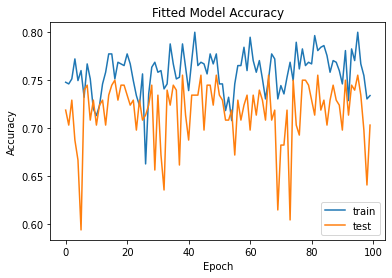

In [23]:
#Plot the accuracies of the training and testing datasets from the fitted model
plt.plot(fitted_mod2.history['acc']) 
plt.plot(fitted_mod2.history['val_acc'])

#Modify the graph to have the correct labels
plt.title('Fitted Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

From the graph, we are able to see similar trends between the training and testing accuracies. The training accuracy appears to have a higher accuracy compared to the testing, while the testing accuracy appears to have more prominant max and min points as epoch increases.

d) Plot the loss for training and validation of the fitted model

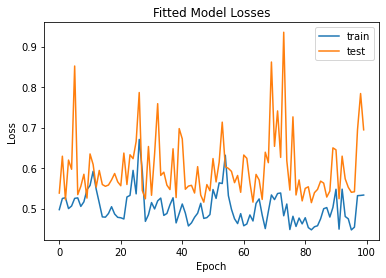

In [24]:
#Plot the losses of the training and testing datasets from the fitted model
plt.plot(fitted_mod2.history['loss'])
plt.plot(fitted_mod2.history['val_loss'])

#Modify the graph to have the correct labels
plt.title('Fitted Model Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

The graph shows us that the training and testing losses have similar trends going on as epoch increases. The major differences between them are that training has lower loss compared to testing and testing has more prominant min and max spikes as epoch increases. 

e) Normalize the data before feeding it to the model and check how normalization affects accuracy

In [ ]:
#Scale the X datasets
scaled_X_train = sc.transform(X_train)
scaled_X_test = sc.transform(X_test)

In [ ]:
model3 = keras.Sequential() # create model

# Change the input_dim for the input from 1 to 8
model3.add(layers.Dense(32, input_dim=8, activation='relu')) # Input layer

model3.add(layers.Dense(64, activation='relu')) # hidden layer

model3.add(layers.Dense(1, activation='sigmoid')) # output layer

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                288       
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,465
Trainable params: 2,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the scaled data to the model
scaled_fit = model3.fit(scaled_X_train, Y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 5ms/step - loss: 0.6719 - acc: 0.5983
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5996 - acc: 0.7461
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5472 - acc: 0.7583
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5075 - acc: 0.7757
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4815 - acc: 0.7774
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4665 - acc: 0.7687
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4567 - acc: 0.7757
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4493 - acc: 0.7739
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4445 - acc: 0.7843
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4421 - acc: 0.7843
Epoch 11/100
18/18 [==============================] - 0s 4m

In [ ]:
# Find the accuracy and loss of the scaled model
scores3 = model3.evaluate(scaled_X_test, Y_test)

6/6 [==============================] - 0s 6ms/step - loss: 0.5369 - acc: 0.7656


In [ ]:
# Present the scores found
print(scores3)

[0.5368731617927551, 0.765625]


Compared to the original accuracy and loss, the scaled data has better accuracy and has a similar loss score.